<a href="https://colab.research.google.com/github/aadiraju/COSC320PlagiarismDetector/blob/main/COSC320ThirdMilestone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC320 Third Milestone


## Rabin-Karp Function 
The following cell defines a function that implements Rabin-Karp on the given pattern and text, and returns a plagiarism percentage from 0% - 100%

In [1]:
# Following program is the python implementation of 
# Rabin Karp Algorithm given in CLRS book 
  
# pat  -> pattern 
# txt  -> text 
# q    -> A prime number 
  
def rabinKarpSearch(pat, txt): 
    q = 101 # A prime number 
    M = len(pat) 
    N = len(txt) 
    i = 0
    j = 0
    p = 0    # hash value for pattern 
    t = 0    # hash value for txt 
    h = 1
    # d is the number of characters in the input alphabet 
    d = 256
  
    # The value of h would be "pow(d, M-1)% q" 
    for i in range(M-1): 
        h = (h * d)% q 
  
    # Calculate the hash value of pattern and first window 
    # of text 
    for i in range(M): 
        p = (d * p + ord(pat[i]))% q 
        t = (d * t + ord(txt[i]))% q 
  
    # Slide the pattern over text one by one 
    for i in range(N-M + 1): 
        # Check the hash values of current window of text and 
        # pattern if the hash values match then only check 
        # for characters on by one 
        if p == t: 
            # Check for characters one by one 
            for j in range(M): 
                if txt[i + j] != pat[j]: 
                    break
  
            j+= 1
            # if p == t and pat[0...M-1] = txt[i, i + 1, ...i + M-1] 
            if j == M: 
                return M #get length of pattern that has a match
  
        # Calculate hash value for next window of text: Remove 
        # leading digit, add trailing digit 
        if i < N-M: 
            t = (d*(t-ord(txt[i])*h) + ord(txt[i + M]))% q 
  
            # We might get negative values of t, converting it to 
            # positive 
            if t < 0: 
                t = t + q
    return 0

def rabinKarpFileMatch(file, cFile):
  corpusFileSize = len(cFile)
  totalFoundChar = 0
  for line in file:
    totalFoundChar += rabinKarpSearch(line,cFile)
  return float(totalFoundChar/corpusFileSize) # value from 0-1 that represents the percentage of matches found between the two documents 

## KMP Function 
The following cell defines a function that implements KMP on the given pattern and text, and returns a plagiarism percentage from 0% - 100%

In [2]:
def kmpHelper(file,cFile):    
    totalFoundChar = 0
    for i in file:
      totalFoundChar += KMPSearch(i,cFile)
    
    corpusFileSize = len(cFile)
    return float(totalFoundChar/corpusFileSize)
    
    # for each string in data, run a for loop to check against each string in the data2 string, so that can be done, and then to return a 


def KMPSearch(pat, txt): 
    M = len(pat) 
    N = len(txt) 
    lps = [0]*M 
    j = 0
    computeLPSArray(pat, M, lps) 
    i = 0 
    while i < N: 
        if pat[j] == txt[i]: 
            i += 1
            j += 1
        if j == M: 
            return M
            j = lps[j-1] 

        elif i < N and pat[j] != txt[i]: 
            if j != 0: 
                j = lps[j-1] 
            else: 
                i += 1
    return 0
  
def computeLPSArray(pat, M, lps): 
    len = 0 # length of the previous longest prefix suffix 
  
    lps[0] # lps[0] is always 0 
    i = 1
  
    # the loop calculates lps[i] for i = 1 to M-1 
    while i < M: 
        if pat[i]== pat[len]: 
            len += 1
            lps[i] = len
            i += 1
        else: 
            # This is tricky. Consider the example. 
            # AAACAAAA and i = 7. The idea is similar  
            # to search step. 
            if len != 0: 
                len = lps[len-1] 
  
                # Also, note that we do not increment i here 
            else: 
                lps[i] = 0
                i += 1

## LCSS Function 
The following cell defines a function that implements LCSS on the given pattern and text, and returns a plagiarism percentage from 0% - 100%

In [3]:
def lcs(file, cFile): 
    # find the length of the strings 
    m = len(file) 
    n = len(cFile) 
  
    # declaring the array for storing the dp values 
    L = [[None]*(n + 1) for i in range(m + 1)] 
  
    """Following steps build L[m + 1][n + 1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of file[0..i-1] 
    and cFile[0..j-1]"""
    for i in range(m + 1): 
        for j in range(n + 1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif file[i-1] == cFile[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of file[0..n-1] & cFile[0..m-1] 
    return L[m][n] 
# end of function lcs 
def lcsHelper(file,cFile):
  totalFoundChar = 0
  for i in file:
    totalFoundChar += lcs(i,cFile)  
  corpusFileSize = len(cFile)
  return float(totalFoundChar/corpusFileSize)

## Main Driver Function
The following function will take the actual input file and compare it against each file in the corpus and return a plagiarism percentage per file.

In [4]:
import os

In [5]:
def plagDetect(directory, dirSize, plagThresh, plagTestFile):
    '''
    Function that will return a set of filenames from which plagTestFile might have plagiarized from.

    Parameters:
    directory : str - path to directory where data files are located
    dirSize : int - number of files other than plagTestFile that the algorithm will search from
    plagThresh : float - a floating-point number between 0 - 1, that defines the percentage threshold to classify a document as potentially plagiarized
    plagTestFile : str - name of the plagiarism test file with extension. No directory. Eg: "plagTestFile.txt"

    Returns:
    potentialPlagDocSet : list(str) - list of filenames in directory from which plagTestFile has plagiarized from.

    '''
    corpus = []
    corpusNames = []
    plagF = ""
    counter = 0

    for file in os.listdir(directory):
         filename = os.fsdecode(file)
         if filename.endswith(".txt") and filename != plagTestFile and counter < dirSize: 
             #Take in each corpus file as a big string where newlines are replaced by spaces
             cf = open(os.path.join(directory,file), "r", encoding="utf-8")
             content = cf.read()
             content_list = content.replace('\n',' ')
             corpus.append(content_list)
             corpusNames.append(filename)
             counter+=1
             cf.close()  
         if filename == plagTestFile:
            # For the plagirarism file, split up by line, in a list.
            with open(os.path.join(directory,file),'r', encoding="utf-8") as plagFile:
                plagF = [line.rstrip('\n') for line in plagFile]
    
    potentialPlagDocSet = []

    for i in range(len(corpus)):
        cFile = corpus[i]
        cFileName = corpusNames[i]
        try:
            simil = 0.5 * kmpHelper(plagF, cFile) + 0.2 * rabinKarpFileMatch(plagF, cFile) + 0.3 * lcsHelper(plagF, cFile)
        except:
            print('Error encountered while parsing file: {}'.format(os.path.join(directory, cFileName)))
        if simil > plagThresh:
            potentialPlagDocSet.append(cFileName)
            
    return potentialPlagDocSet

In [6]:
import matplotlib.pyplot as plt
import time
from random import choice
import os

def tryItABunch(myFn, startN=1, endN=100, stepSize=1, numTrials=20):
    nValues = []
    tValues = []
    directory = "g17_corpusfinal/"
    plagThresh = 0.1
    plagTestFile = "plagarism_test_file.txt"
    for n in range(startN, endN, stepSize):
        # run myFn several times and average to get a decent idea.
        runtime = 0
        for t in range(numTrials):
            lst = n # generate a random list of length n
            start = time.time()
            myFn(directory, n, plagThresh, plagTestFile)
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        runtime = runtime/numTrials
        nValues.append(n)
        tValues.append(runtime)

    return nValues, tValues


start = 1
end = 100
step = 10
nFiles, tTimesofRuntime = tryItABunch( plagDetect, startN = start, endN = end, stepSize=step, numTrials=1)

Text(0.5, 1.0, 'Naive algorithm theoretical runtime vs. actual runtime')

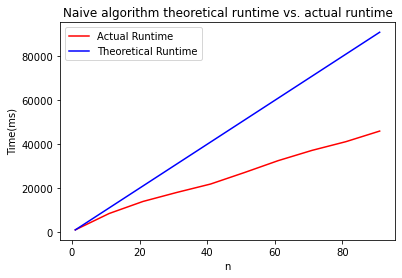

In [10]:
tTimesofRuntime = [x for x in tTimesofRuntime]

tValues = [ 1000*x for x in range(start,end,step)]
nValues = [ x for x in range(start,end,step)]

plt.plot(nFiles, tTimesofRuntime, color="red", label="Actual Runtime")
plt.plot(nValues, tValues, color="blue", label="Theoretical Runtime")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Naive algorithm theoretical runtime vs. actual runtime")